In [1]:
%matplotlib inline
import plot_helpers as ph
from plot_helpers import PlotDef, DataEntry

In [2]:
propublica_datafiles = [
    ('../results/eq_opp_propublic_2018-06-14/propublica-recidivism_race_numerical-binsensitive_origin.csv', 'Propublica (race)'),
    ('../results/eq_opp_propublic_2018-06-14/propublica-recidivism_sex_numerical-binsensitive_origin.csv', 'Propublica (sex)'),
]

In [3]:
def label_change(label):
    parts = label.split('_')
    tnr0 = parts[6]
    tnr1 = parts[8]
    tpr = parts[10]
    in_True = parts[4] == "True"
    optional_star = "*" if in_True else ""
    # return f"EqOpp{optional_star} 1-TNR = {tnr1}", True
    return f"1-TNR = {tnr1}", True

def filter_algos(label):
    return ("True" in label) and ("1.0" not in label)

data = ph.parse_all(propublica_datafiles, filter_algos, label_change)
data = ph.merge_same_labels(data)

In [4]:
# reorder the entries
#for i, d in enumerate(data):
#    data[i] = d._replace(entries=d.entries[2:3] + d.entries[0:2])

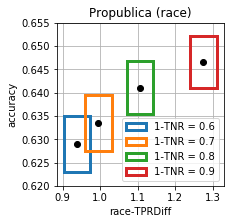

In [5]:
xaxis = ('race-TPRDiff', 'race-TPRDiff')
yaxis = ('accuracy', 'accuracy')
fig, plots = ph.errorbox(data[:1], xaxis, yaxis, figsize=(3,3))
plots[0, 0].set_ylim(0.62, 0.655)
fig.savefig('eqopp_1tnr.eps', bbox_inches='tight')